In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [9]:
from util import CHARACTERIZATION_FILE
#reads projects from Excel file
df = pd.read_excel(CHARACTERIZATION_FILE, keep_default_na=False)
len(df)
df.head()

,Projects,Domains,Redis,MariaDB,Neo4j,HBase,Elasticsearch,Oracle,DynamoDB,IBM DB2,MongoDB,SQLite,Solr,PostgreSQL,Cassandra,MS SQL Server,MS Access,MySQL
0,Activiti,automation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,airbyte,infrastructure management,1,0,0,0,0,1,1,1,0,0,0,1,0,1,0,1
2,airsonic,media,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
df.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL            89
PostgreSQL       62
Redis            56
Oracle           48
MariaDB          35
MongoDB          32
MS SQL Server    30
SQLite           26
Elasticsearch    22
IBM DB2          20
DynamoDB         17
HBase            13
Cassandra        13
Solr             12
Neo4j             5
MS Access         1
dtype: int64

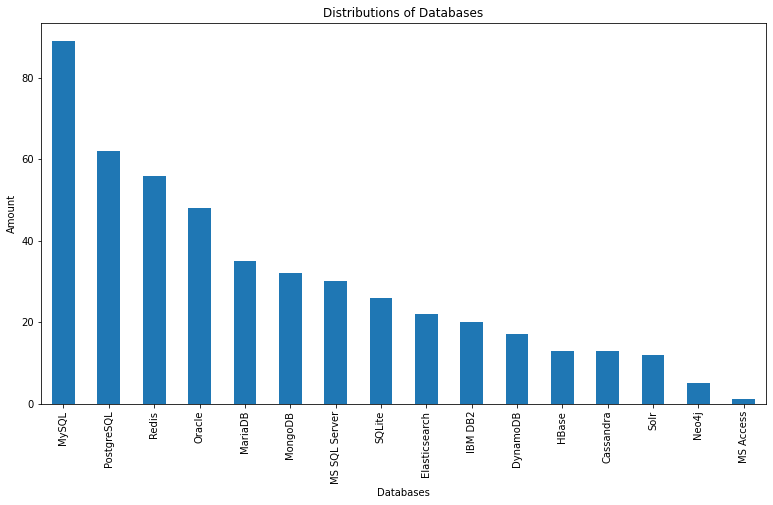

In [11]:
plt.figure(figsize=(13,7))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Databases")
plt.xlabel("Databases")
plt.ylabel("Amount")
plt.show() 

<AxesSubplot:title={'center':'Histogram - Frequency distributions of Databases'}, ylabel='Frequency'>

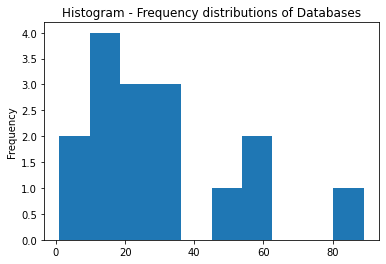

In [12]:
df.iloc[: , 2:].sum().plot(kind='hist', title="Histogram - Frequency distributions of Databases")

In [13]:
df.Domains.value_counts()

software development         75
media                        44
infrastructure management    40
security                     18
monitoring                   18
network                      18
game                         18
communication                16
hpc                          15
program analysis             15
machine learning             12
automation                    9
file management               7
application container         7
collaboration                 3
operating system              3
erp                           2
cryptocurrency                2
scm                           2
gestão pessoal                2
cms                           1
                              1
e-commerce                    1
Name: Domains, dtype: int64

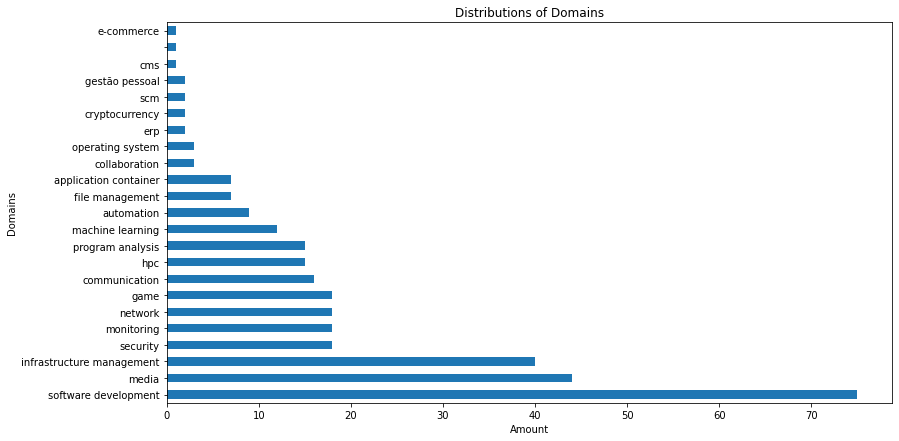

In [14]:
plt.figure(figsize=(13,7))
df.Domains.value_counts().plot(kind='barh', title = 'Distributions of Domains')
plt.xlabel("Amount")
plt.ylabel("Domains")
plt.show() 

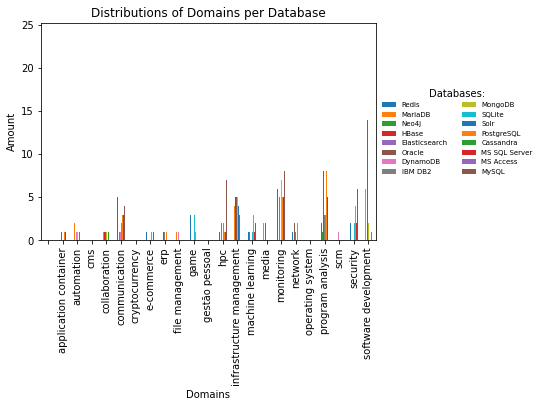

In [15]:
df.groupby(df.Domains).sum().plot(kind='bar')
plt.legend(title = "Databases:", frameon=False, ncol=2, prop={'size': 7}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Distributions of Domains per Database")
plt.ylabel("Amount")
plt.show() 

In [16]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df.head()

,Projects,Domains,Redis,MariaDB,Neo4j,HBase,Elasticsearch,Oracle,DynamoDB,IBM DB2,MongoDB,SQLite,Solr,PostgreSQL,Cassandra,MS SQL Server,MS Access,MySQL,SumPerProject
0,Activiti,automation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,airbyte,infrastructure management,1,0,0,0,0,1,1,1,0,0,0,1,0,1,0,1,7
2,airsonic,media,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


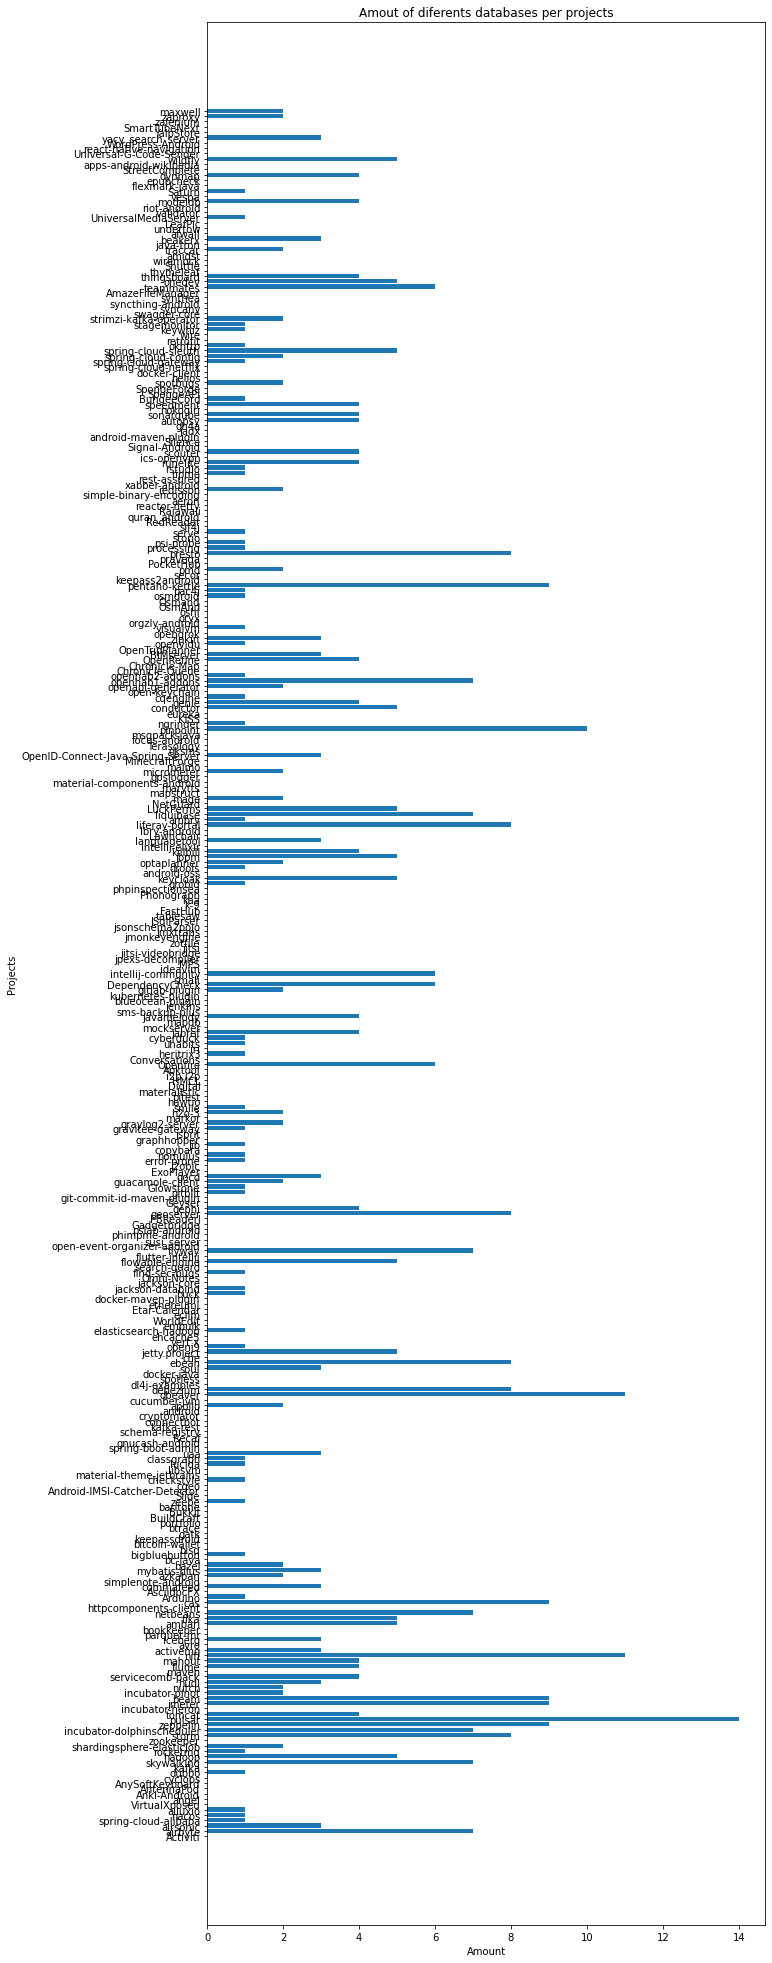

In [17]:
plt.figure(figsize=(10,35))
plt.barh(df.Projects, df.SumPerProject)
plt.title("Amout of diferents databases per projects")
plt.xlabel("Amount")
plt.ylabel("Projects")
plt.show()